In [ ]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as pkt

import seaborn as sns

%matplotlib inline  #Cell Magic

## Spotify Song Attribute 
-Import Data

-EDA

-Train aClassifier(Decision Tree)

-Predict target using train classifier

In [2]:
data = pd.read_csv('desktop/data.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [5]:
data.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [6]:
data.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [8]:
train, test = train_test_split(data,test_size=.15)

In [10]:
print("Training Size: {}: Test Size: {}". format(len(train), len(test)))

Training Size: 1714: Test Size: 303


In [11]:
train.shape

(1714, 17)

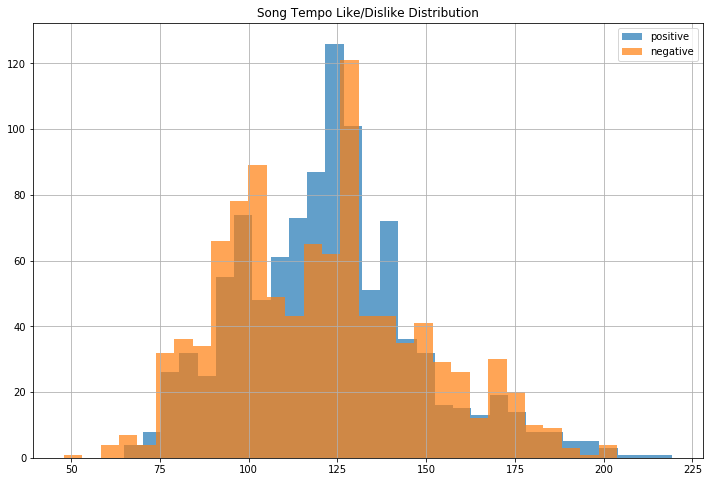

In [18]:
pos_tempo = data[data['target'] ==1] ['tempo']
neg_tempo = data[data['target'] ==0] ['tempo']

fig = pkt.figure(figsize=(12,8))

pkt.title('Song Tempo Like/Dislike Distribution')
pos_tempo.hist(alpha = 0.7, bins = 30, label = 'positive')
neg_tempo.hist(alpha = 0.7, bins = 30, label = 'negative')
pkt.legend(loc="upper right")